In [30]:
import requests
import pandas as pd
import ivolatility as ivol
import matplotlib.pyplot as plt
import numpy as np
import holidays
import time
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# ivolatility connection
apiKey = 'eKeT1S7CZ6pnAiqH'
ivol.setLoginParams(apiKey=apiKey)

Get option Ticker

In [2]:
# Variables
symbol = 'DELL'
date = '2024-04-30'

In [3]:
"""
# Get Nearest Option Price
getMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers')
marketData = getMarketData(symbol=symbol, startingDate=date, dte=60, moneyness=0, callPut='P')
df_near = pd.DataFrame(marketData)
first_option_id = df_near.iloc[0]["option_id"]
first_option_symbol= df_near.iloc[0]["option_symbol"]
print(first_option_symbol)
df_near
"""

'\n# Get Nearest Option Price\ngetMarketData = ivol.setMethod(\'/equities/eod/nearest-option-tickers\')\nmarketData = getMarketData(symbol=symbol, startingDate=date, dte=60, moneyness=0, callPut=\'P\')\ndf_near = pd.DataFrame(marketData)\nfirst_option_id = df_near.iloc[0]["option_id"]\nfirst_option_symbol= df_near.iloc[0]["option_symbol"]\nprint(first_option_symbol)\ndf_near\n'

EOD nearest current option prices on delta

In [4]:
"""
getMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers-with-prices-nbbo')
marketData = getMarketData(symbol='FDX', dte=100, delta=-.9, cp='P')
marketData
"""

"\ngetMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers-with-prices-nbbo')\nmarketData = getMarketData(symbol='FDX', dte=100, delta=-.9, cp='P')\nmarketData\n"

In [5]:
"""
getMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers-with-prices-nbbo')
marketData = getMarketData(symbol='FDX', dte=100, delta=.9, cp='C')
marketData
"""

"\ngetMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers-with-prices-nbbo')\nmarketData = getMarketData(symbol='FDX', dte=100, delta=.9, cp='C')\nmarketData\n"

EOD options prices on delta and date

In [6]:
"""
getMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers-with-prices-nbbo')
marketData = getMarketData(symbol='TQQQ', startingDate='2022-03-15', delta=.9, dte=100, cp='C')
marketData
"""

"\ngetMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers-with-prices-nbbo')\nmarketData = getMarketData(symbol='TQQQ', startingDate='2022-03-15', delta=.9, dte=100, cp='C')\nmarketData\n"

In [7]:
"""
getMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers-with-prices-nbbo')
marketData = getMarketData(symbol='TQQQ', startingDate='2022-03-15', delta=.9, dte=120, cp='C')
marketData
"""

"\ngetMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers-with-prices-nbbo')\nmarketData = getMarketData(symbol='TQQQ', startingDate='2022-03-15', delta=.9, dte=120, cp='C')\nmarketData\n"

In [8]:
getMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers')
marketData = getMarketData(symbol='DELL', dte=100, delta=-.3, callPut='P')
df_find_delta_P = pd.DataFrame(marketData)
option_symbol_P = df_find_delta_P['option_symbol'].iloc[0]
print(option_symbol_P)

DELL  241018P00120000


In [9]:
getMarketData = ivol.setMethod('/equities/eod/nearest-option-tickers')
marketData = getMarketData(symbol='DELL', dte=100, delta=.3, callPut='C')
df_find_delta_C = pd.DataFrame(marketData)
option_symbol_C = df_find_delta_C['option_symbol'].iloc[0]
print(option_symbol_C)

DELL  241018C00165000


Get option prices

In [15]:
getMarketData = ivol.setMethod('/equities/intraday/single-equity-optionsymbol-rawiv')
marketData_P = getMarketData(optionSymbol=option_symbol_P, date='2024-06-14', minuteType='HOUR') 
marketData_P

,timestamp,stockId,stockSymbol,optionExpirationDate,optionStrike,optionType,optionStyle,optionSymbol,optionBidPrice,optionAskPrice,optionBidDateTime,optionAskDateTime,optionBidSize,optionAskSize,optionBidExchange,optionAskExchange,optionVolume,optionIv,underlyingPrice,optionDelta,optionGamma,optionTheta,optionVega,optionRho,optionPreIv,optionImpliedYield,calcTimestamp
0,2024-06-14 10:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.5,7.7,2024-06-14 09:59:05,2024-06-14 09:59:05,183,252,XO,XO,1,0.4754,134.0554,-0.28185,0.009150,-0.045820,0.26983,-0.13319,0.4754,0.014899,2024-06-14 09:59:22
1,2024-06-14 11:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.5,7.8,2024-06-14 10:59:46,2024-06-14 10:59:46,623,654,XO,XO,1,0.4802,134.2946,-0.28054,0.009025,-0.046270,0.26994,-0.13296,0.4802,0.014310,2024-06-14 11:00:01
2,2024-06-14 12:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,8.1,8.3,2024-06-14 11:59:48,2024-06-14 11:59:48,72,121,ME,XO,2,0.4817,132.6443,-0.29646,0.009341,-0.047043,0.26911,-0.13907,0.4817,0.016201,2024-06-14 11:59:59
3,2024-06-14 13:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,8.1,8.3,2024-06-14 12:59:48,2024-06-14 12:59:48,359,264,XO,XO,5,0.4792,132.3949,-0.29821,0.009436,-0.046773,0.26886,-0.13931,0.4792,0.015621,2024-06-14 12:59:58
4,2024-06-14 14:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,8.1,8.3,2024-06-14 13:59:39,2024-06-14 13:59:39,363,89,XO,XO,15,0.4812,132.5482,-0.29700,0.009372,-0.046925,0.26889,-0.13894,0.4812,0.015156,2024-06-14 13:59:59
5,2024-06-14 15:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.7,8.0,2024-06-14 14:59:48,2024-06-14 14:59:48,459,482,XO,XO,15,0.4812,133.6689,-0.28629,0.009141,-0.046523,0.26935,-0.13498,0.4812,0.013765,2024-06-14 14:59:59
6,2024-06-14 16:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.4,7.6,2024-06-14 15:59:09,2024-06-14 15:59:09,303,171,XO,XO,25,0.4805,134.8427,-0.27565,0.008908,-0.046152,0.26057,-0.13130,0.4805,0.014244,2024-06-14 15:59:23


In [13]:
getMarketData = ivol.setMethod('/equities/intraday/single-equity-optionsymbol-rawiv')
marketData_C = getMarketData(optionSymbol=option_symbol_C, date='2024-06-14', minuteType='HOUR') 
marketData_C

,timestamp,stockId,stockSymbol,optionExpirationDate,optionStrike,optionType,optionStyle,optionSymbol,optionBidPrice,optionAskPrice,optionBidDateTime,optionAskDateTime,optionBidSize,optionAskSize,optionBidExchange,optionAskExchange,optionVolume,optionIv,underlyingPrice,optionDelta,optionGamma,optionTheta,optionVega,optionRho,optionPreIv,optionImpliedYield,calcTimestamp
0,2024-06-14 10:00:00,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.0,6.2,2024-06-14 09:59:05,2024-06-14 09:59:05,119,398,XO,XO,2,0.4834,134.0554,0.29247,0.008992,-0.054952,0.27019,0.11451,0.4834,0.014899,2024-06-14 09:59:22
1,2024-06-14 11:00:00,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.3,6.5,2024-06-14 10:59:41,2024-06-14 10:59:43,148,293,W,XO,153,0.4916,134.2946,0.29962,0.008926,-0.056654,0.27366,0.11700,0.4916,0.014310,2024-06-14 11:00:01
2,2024-06-14 12:00:00,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,5.7,5.9,2024-06-14 11:59:47,2024-06-14 11:59:48,222,83,XO,W,153,0.4882,132.6443,0.28192,0.008845,-0.053751,0.26261,0.10921,0.4882,0.016201,2024-06-14 11:59:59
3,2024-06-14 13:00:00,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,5.7,5.9,2024-06-14 12:59:47,2024-06-14 12:59:48,1,265,PO,XO,164,0.4906,132.3949,0.28143,0.008812,-0.053929,0.26188,0.10871,0.4906,0.015621,2024-06-14 12:59:58
4,2024-06-14 14:00:00,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,5.7,5.9,2024-06-14 13:59:39,2024-06-14 13:59:39,57,399,XO,XO,164,0.4889,132.5482,0.28190,0.008844,-0.053915,0.26238,0.10904,0.4889,0.015156,2024-06-14 13:59:59
5,2024-06-14 15:00:00,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.0,6.2,2024-06-14 14:59:48,2024-06-14 14:59:48,54,265,XO,XO,164,0.4874,133.6689,0.29170,0.008942,-0.055324,0.26892,0.11358,0.4874,0.013765,2024-06-14 14:59:59
6,2024-06-14 16:00:00,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.4,6.6,2024-06-14 15:59:07,2024-06-14 15:59:07,53,307,XO,XO,165,0.4896,134.8427,0.30318,0.008981,-0.057046,0.27601,0.11869,0.4896,0.014244,2024-06-14 15:59:23


In [20]:
df_merged = pd.merge(marketData_P, marketData_C, how= 'left', on='timestamp')  
df_merged

,timestamp,stockId_x,stockSymbol_x,optionExpirationDate_x,optionStrike_x,optionType_x,optionStyle_x,optionSymbol_x,optionBidPrice_x,optionAskPrice_x,optionBidDateTime_x,optionAskDateTime_x,optionBidSize_x,optionAskSize_x,optionBidExchange_x,optionAskExchange_x,optionVolume_x,optionIv_x,underlyingPrice_x,optionDelta_x,optionGamma_x,optionTheta_x,optionVega_x,optionRho_x,optionPreIv_x,optionImpliedYield_x,calcTimestamp_x,stockId_y,stockSymbol_y,optionExpirationDate_y,optionStrike_y,optionType_y,optionStyle_y,optionSymbol_y,optionBidPrice_y,optionAskPrice_y,optionBidDateTime_y,optionAskDateTime_y,optionBidSize_y,optionAskSize_y,optionBidExchange_y,optionAskExchange_y,optionVolume_y,optionIv_y,underlyingPrice_y,optionDelta_y,optionGamma_y,optionTheta_y,optionVega_y,optionRho_y,optionPreIv_y,optionImpliedYield_y,calcTimestamp_y
0,2024-06-14 10:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.5,7.7,2024-06-14 09:59:05,2024-06-14 09:59:05,183,252,XO,XO,1,0.4754,134.0554,-0.28185,0.009150,-0.045820,0.26983,-0.13319,0.4754,0.014899,2024-06-14 09:59:22,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.0,6.2,2024-06-14 09:59:05,2024-06-14 09:59:05,119,398,XO,XO,2,0.4834,134.0554,0.29247,0.008992,-0.054952,0.27019,0.11451,0.4834,0.014899,2024-06-14 09:59:22
1,2024-06-14 11:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.5,7.8,2024-06-14 10:59:46,2024-06-14 10:59:46,623,654,XO,XO,1,0.4802,134.2946,-0.28054,0.009025,-0.046270,0.26994,-0.13296,0.4802,0.014310,2024-06-14 11:00:01,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.3,6.5,2024-06-14 10:59:41,2024-06-14 10:59:43,148,293,W,XO,153,0.4916,134.2946,0.29962,0.008926,-0.056654,0.27366,0.11700,0.4916,0.014310,2024-06-14 11:00:01
2,2024-06-14 12:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,8.1,8.3,2024-06-14 11:59:48,2024-06-14 11:59:48,72,121,ME,XO,2,0.4817,132.6443,-0.29646,0.009341,-0.047043,0.26911,-0.13907,0.4817,0.016201,2024-06-14 11:59:59,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,5.7,5.9,2024-06-14 11:59:47,2024-06-14 11:59:48,222,83,XO,W,153,0.4882,132.6443,0.28192,0.008845,-0.053751,0.26261,0.10921,0.4882,0.016201,2024-06-14 11:59:59
3,2024-06-14 13:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,8.1,8.3,2024-06-14 12:59:48,2024-06-14 12:59:48,359,264,XO,XO,5,0.4792,132.3949,-0.29821,0.009436,-0.046773,0.26886,-0.13931,0.4792,0.015621,2024-06-14 12:59:58,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,5.7,5.9,2024-06-14 12:59:47,2024-06-14 12:59:48,1,265,PO,XO,164,0.4906,132.3949,0.28143,0.008812,-0.053929,0.26188,0.10871,0.4906,0.015621,2024-06-14 12:59:58
4,2024-06-14 14:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,8.1,8.3,2024-06-14 13:59:39,2024-06-14 13:59:39,363,89,XO,XO,15,0.4812,132.5482,-0.29700,0.009372,-0.046925,0.26889,-0.13894,0.4812,0.015156,2024-06-14 13:59:59,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,5.7,5.9,2024-06-14 13:59:39,2024-06-14 13:59:39,57,399,XO,XO,164,0.4889,132.5482,0.28190,0.008844,-0.053915,0.26238,0.10904,0.4889,0.015156,2024-06-14 13:59:59
5,2024-06-14 15:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.7,8.0,2024-06-14 14:59:48,2024-06-14 14:59:48,459,482,XO,XO,15,0.4812,133.6689,-0.28629,0.009141,-0.046523,0.26935,-0.13498,0.4812,0.013765,2024-06-14 14:59:59,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.0,6.2,2024-06-14 14:59:48,2024-06-14 14:59:48,54,265,XO,XO,164,0.4874,133.6689,0.29170,0.008942,-0.055324,0.26892,0.11358,0.4874,0.013765,2024-06-14 14:59:59
6,2024-06-14 16:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.4,7.6,2024-06-14 15:59:09,2024-06-14 15:59:09,303,171,XO,XO,25,0.4805,134.8427,-0.27565,0.008908,-0.046152,0.26057,-0.13130,0.4805,0.014244,2024-06-14 15:59:23,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.4,6.6,2024-06-14 15:59:07,2024-06-14 15:59:07,53,307,XO,XO,165,0.4896,134.8427,0.30318,0.008981,-0.057046,0.27601,0.11869,0.4896,0.014244,2024-06-14 15:59:23


In [21]:
df_merged.rename(columns={'stockSymbol_x':'ticker','optionExpirationDate_x':'expiration','optionBidPrice_x':'bid_Puts', 'optionBidPrice_y':'bid_Calls' },inplace=True)
df_merged

,timestamp,stockId_x,ticker,expiration,optionStrike_x,optionType_x,optionStyle_x,optionSymbol_x,bid_Puts,optionAskPrice_x,optionBidDateTime_x,optionAskDateTime_x,optionBidSize_x,optionAskSize_x,optionBidExchange_x,optionAskExchange_x,optionVolume_x,optionIv_x,underlyingPrice_x,optionDelta_x,optionGamma_x,optionTheta_x,optionVega_x,optionRho_x,optionPreIv_x,optionImpliedYield_x,calcTimestamp_x,stockId_y,stockSymbol_y,optionExpirationDate_y,optionStrike_y,optionType_y,optionStyle_y,optionSymbol_y,bid_Calls,optionAskPrice_y,optionBidDateTime_y,optionAskDateTime_y,optionBidSize_y,optionAskSize_y,optionBidExchange_y,optionAskExchange_y,optionVolume_y,optionIv_y,underlyingPrice_y,optionDelta_y,optionGamma_y,optionTheta_y,optionVega_y,optionRho_y,optionPreIv_y,optionImpliedYield_y,calcTimestamp_y
0,2024-06-14 10:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.5,7.7,2024-06-14 09:59:05,2024-06-14 09:59:05,183,252,XO,XO,1,0.4754,134.0554,-0.28185,0.009150,-0.045820,0.26983,-0.13319,0.4754,0.014899,2024-06-14 09:59:22,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.0,6.2,2024-06-14 09:59:05,2024-06-14 09:59:05,119,398,XO,XO,2,0.4834,134.0554,0.29247,0.008992,-0.054952,0.27019,0.11451,0.4834,0.014899,2024-06-14 09:59:22
1,2024-06-14 11:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.5,7.8,2024-06-14 10:59:46,2024-06-14 10:59:46,623,654,XO,XO,1,0.4802,134.2946,-0.28054,0.009025,-0.046270,0.26994,-0.13296,0.4802,0.014310,2024-06-14 11:00:01,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.3,6.5,2024-06-14 10:59:41,2024-06-14 10:59:43,148,293,W,XO,153,0.4916,134.2946,0.29962,0.008926,-0.056654,0.27366,0.11700,0.4916,0.014310,2024-06-14 11:00:01
2,2024-06-14 12:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,8.1,8.3,2024-06-14 11:59:48,2024-06-14 11:59:48,72,121,ME,XO,2,0.4817,132.6443,-0.29646,0.009341,-0.047043,0.26911,-0.13907,0.4817,0.016201,2024-06-14 11:59:59,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,5.7,5.9,2024-06-14 11:59:47,2024-06-14 11:59:48,222,83,XO,W,153,0.4882,132.6443,0.28192,0.008845,-0.053751,0.26261,0.10921,0.4882,0.016201,2024-06-14 11:59:59
3,2024-06-14 13:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,8.1,8.3,2024-06-14 12:59:48,2024-06-14 12:59:48,359,264,XO,XO,5,0.4792,132.3949,-0.29821,0.009436,-0.046773,0.26886,-0.13931,0.4792,0.015621,2024-06-14 12:59:58,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,5.7,5.9,2024-06-14 12:59:47,2024-06-14 12:59:48,1,265,PO,XO,164,0.4906,132.3949,0.28143,0.008812,-0.053929,0.26188,0.10871,0.4906,0.015621,2024-06-14 12:59:58
4,2024-06-14 14:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,8.1,8.3,2024-06-14 13:59:39,2024-06-14 13:59:39,363,89,XO,XO,15,0.4812,132.5482,-0.29700,0.009372,-0.046925,0.26889,-0.13894,0.4812,0.015156,2024-06-14 13:59:59,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,5.7,5.9,2024-06-14 13:59:39,2024-06-14 13:59:39,57,399,XO,XO,164,0.4889,132.5482,0.28190,0.008844,-0.053915,0.26238,0.10904,0.4889,0.015156,2024-06-14 13:59:59
5,2024-06-14 15:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.7,8.0,2024-06-14 14:59:48,2024-06-14 14:59:48,459,482,XO,XO,15,0.4812,133.6689,-0.28629,0.009141,-0.046523,0.26935,-0.13498,0.4812,0.013765,2024-06-14 14:59:59,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.0,6.2,2024-06-14 14:59:48,2024-06-14 14:59:48,54,265,XO,XO,164,0.4874,133.6689,0.29170,0.008942,-0.055324,0.26892,0.11358,0.4874,0.013765,2024-06-14 14:59:59
6,2024-06-14 16:00:00,25664,DELL,2024-10-18,120.0,P,A,DELL 241018P00120000,7.4,7.6,2024-06-14 15:59:09,2024-06-14 15:59:09,303,171,XO,XO,25,0.4805,134.8427,-0.27565,0.008908,-0.046152,0.26057,-0.13130,0.4805,0.014244,2024-06-14 15:59:23,25664,DELL,2024-10-18,165.0,C,A,DELL 241018C00165000,6.4,6.6,2024-06-14 15:59:07,2024-06-14 15:59:07,53,307,XO,XO,165,0.4896,134.8427,0.30318,0.008981,-0.057046,0.27601,0.11869,0.4896,0.014244,2024-06-14 15:59:23


In [28]:
df_subset =df_merged[['timestamp','ticker','expiration','optionStrike_x','optionStrike_y','bid_Puts', 'bid_Calls','optionIv_x','optionIv_y']]

In [31]:
df_subset['diff'] = df_subset['bid_Puts'] - df_subset['bid_Calls']
df_subset

,timestamp,ticker,expiration,optionStrike_x,optionStrike_y,bid_Puts,bid_Calls,optionIv_x,optionIv_y,diff
0,2024-06-14 10:00:00,DELL,2024-10-18,120.0,165.0,7.5,6.0,0.4754,0.4834,1.5
1,2024-06-14 11:00:00,DELL,2024-10-18,120.0,165.0,7.5,6.3,0.4802,0.4916,1.2
2,2024-06-14 12:00:00,DELL,2024-10-18,120.0,165.0,8.1,5.7,0.4817,0.4882,2.4
3,2024-06-14 13:00:00,DELL,2024-10-18,120.0,165.0,8.1,5.7,0.4792,0.4906,2.4
4,2024-06-14 14:00:00,DELL,2024-10-18,120.0,165.0,8.1,5.7,0.4812,0.4889,2.4
5,2024-06-14 15:00:00,DELL,2024-10-18,120.0,165.0,7.7,6.0,0.4812,0.4874,1.7
6,2024-06-14 16:00:00,DELL,2024-10-18,120.0,165.0,7.4,6.4,0.4805,0.4896,1.0


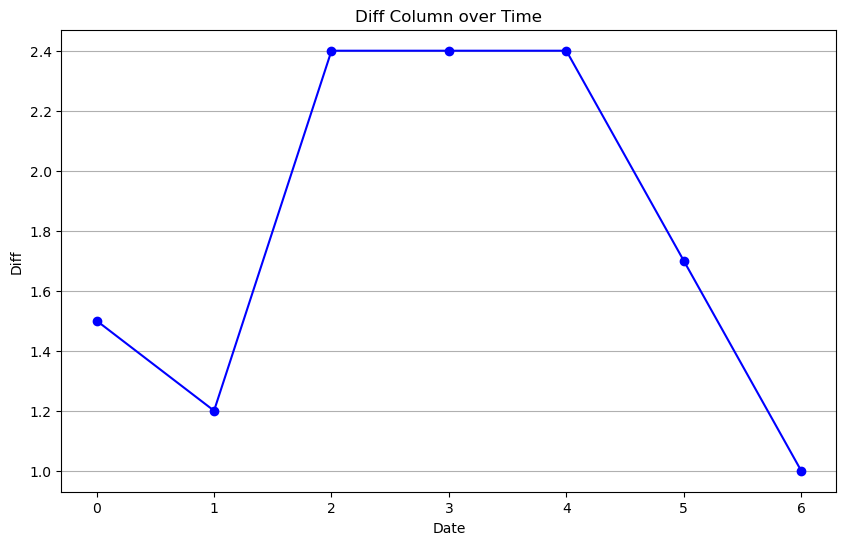

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df_subset.index, df_subset['diff'], marker='o', linestyle='-', color='b')
plt.title('Diff Column over Time')
plt.xlabel('Date')
plt.ylabel('Diff')
plt.grid(axis='y')
plt.show()